In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numerik import qr

In [2]:
# newton alogorythm
def newton(f, df, x, tol = 1e-14, maxStep = 100) :
    step = 0
    error = np.linalg.norm(f(x))
    while error > tol and step < maxStep:
        #print(step, x, error)
        x += qr.linsolve_least_squares(df(x), -f(x))
        error = np.linalg.norm(f(x))        
        step += 1
        
    return x

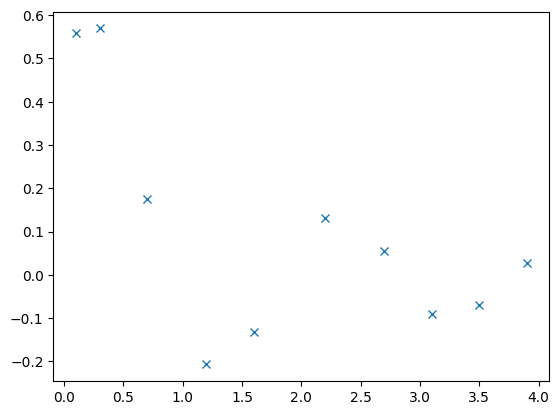

In [3]:
data = np.array([
    [0.1, 0.3, 0.7, 1.2, 1.6, 2.2, 2.7, 3.1, 3.5, 3.9],
    [0.558, 0.569, 0.176, -0.207, -0.133, 0.132, 0.055, -0.090, -0.069, 0.027]
]).T

t = data[:,0]
y = data[:,1]

plt.plot(t, y, "x")
plt.show()

[ 0.73535605  0.79620177 -3.07449929  2.5374114 ]


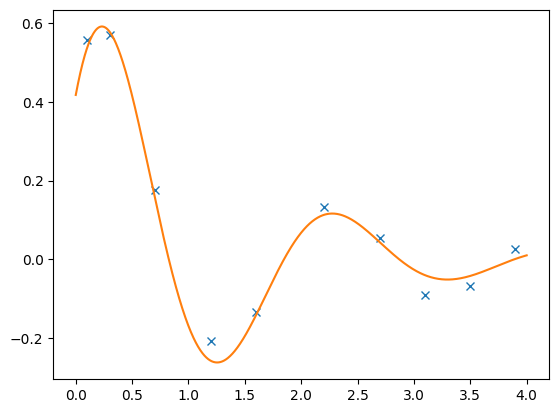

In [4]:
# model function
def yf(t, x):
    a, tau, omega, phi = x
    return a*np.exp(-tau*t)*np.sin(omega*t+phi)

def fitness_function(t, x, y): # function that needs to be optimized to zero
    return yf(t, x) - y

# model gradient
def fitness_function_jacobi(t, x):
    a, tau, omega, phi = x
    return np.array([np.exp(-tau*t)*np.sin(omega*t+phi),
                     -t*a*np.exp(-tau*t)*np.sin(omega*t+phi),
                     t*a*np.exp(-tau*t)*np.cos(omega*t+phi),
                     a*np.exp(-tau*t)*np.cos(omega*t+phi)]).T


def fit_parameters(t, y, x0):
    f = lambda x: fitness_function(t, x, y)
    df = lambda x: fitness_function_jacobi(t, x)

    p = newton(f, df, x0)
    return p

x = fit_parameters(t, y, x0=[1., 1., -1., 1.])
print(x)

t2 = np.linspace(0, 4, 1000)

plt.plot(t, y, "x")
plt.plot(t2, yf(t2, x))
plt.show()
